<a href="https://colab.research.google.com/github/namita0210/music-genre-classification/blob/main/Music_Genre_CLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [18]:
from IPython.display import Audio
import librosa as lb
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Demo : Sample audio wave analysis

In [19]:
demo_audio_path = '/content/drive/MyDrive/music/sad/guitar.mp3'
y,sr=lb.load(demo_audio_path)
print(y)

[ 4.6566129e-10  1.0477379e-09  2.7939677e-09 ... -1.7053026e-13
  1.5205615e-12  1.6768809e-12]


In [29]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'Amplitude')

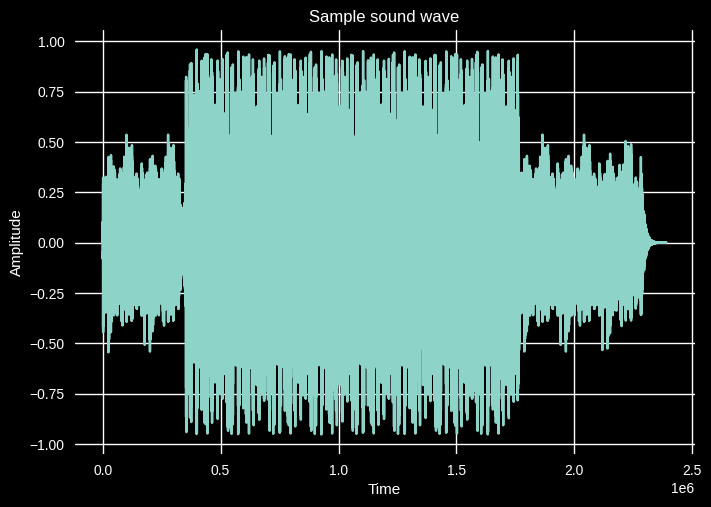

In [30]:
plt.style.use('dark_background')
plt.plot(y)
plt.title('Sample sound wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')

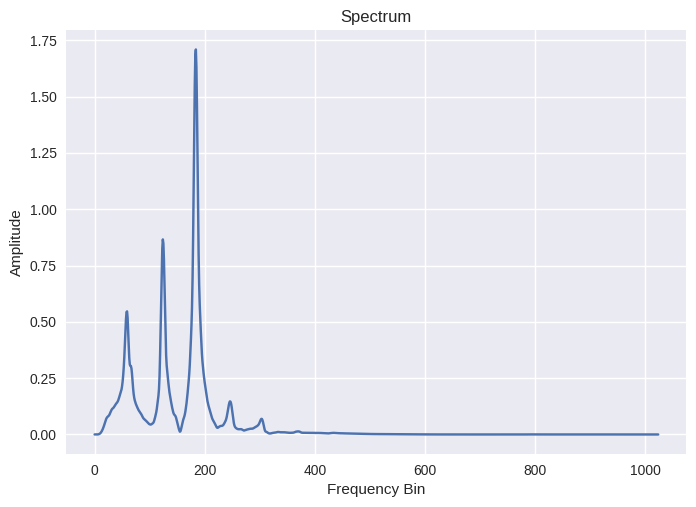

In [23]:
n_fft = 2048
ft = np.abs(lb.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

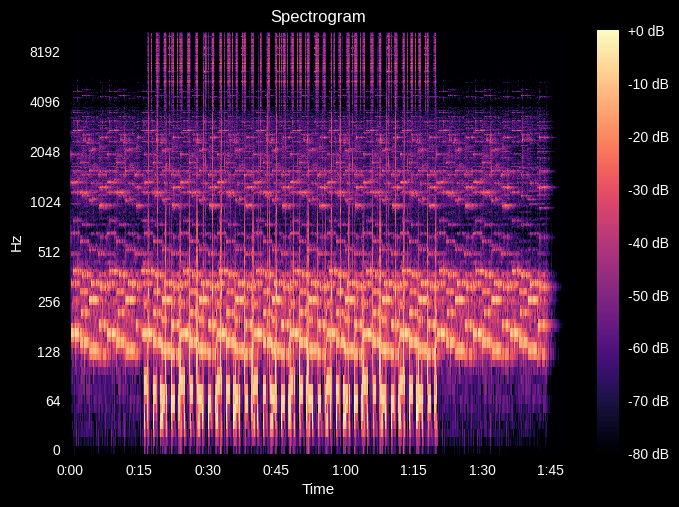

In [31]:
spec = np.abs(lb.stft(y, hop_length=512))
spec = lb.amplitude_to_db(spec, ref=np.max)
lb.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

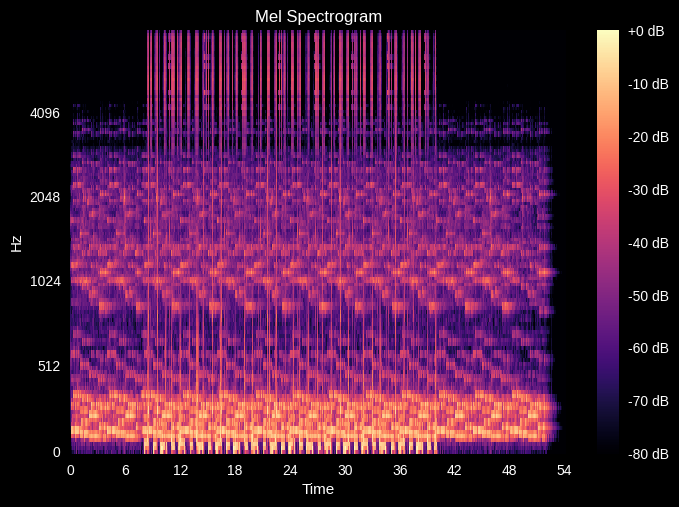

In [35]:
mel_spect = lb.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect_db = lb.power_to_db(mel_spect, ref=np.max)
lb.display.specshow(mel_spect_db, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

Audio data analysis on all the sound tracks within the directory - music

In [36]:
def cut_song(song):
  start = 0
  end = len(song)
  song_pieces = []
  while start + 100000 < end:
    song_pieces.append(song[start:start+100000])
    start += 100000
  return song_pieces

In [44]:
def generate_mel_spectrogram(audio_data, sample_rate=22050, n_fft=2048, hop_length=512):
    mel_spectrogram=lb.feature.melspectrogram(y=audio_data, sr=sr, n_fft=2048, hop_length=1024)
    mel_spectrogram_db = lb.power_to_db(mel_spectrogram, ref=np.max)
    return mel_spectrogram_db

In [45]:
def prepare_song(song_path):
  list_matrices = []
  y,sr = lb.load(song_path,sr=22050)
  song_pieces = cut_song(y)
  for sp in song_pieces:
    melspect = generate_mel_spectrogram(audio_data=sp)
    list_matrices.append(melspect)
  return list_matrices

In [46]:
horror_file_path = '/content/drive/MyDrive/music/horror'
sad_file_path = '/content/drive/MyDrive/music/sad'

In [47]:
def get_mp3_files(folder_path):
    mp3_files = [file for file in os.listdir(folder_path) if file.endswith('.mp3')]
    return mp3_files

In [48]:
horror_song_names =[]
horror_song_names = get_mp3_files(horror_file_path)
print(horror_song_names)

sad_song_names = []
sad_song_names = get_mp3_files(sad_file_path)
print(sad_song_names)

['whip.mp3', 'leonell.mp3', 'stranger.mp3', 'sinister.mp3', 'dark.mp3', 'spider.mp3', 'trap.mp3', 'creepy.mp3', 'mysterious.mp3', 'bewitched.mp3']
['psycho.mp3', 'water.mp3', 'emotional.mp3', 'nature.mp3', 'sadtrap.mp3', 'toxic.mp3', 'guitar.mp3', 'soul.mp3', 'lonewolf.mp3', 'hippysad.mp3']


In [49]:
all_tracks = []
genre = []

for song in horror_song_names:
  song_pieces = prepare_song(horror_file_path +'/'+ song)
  all_tracks += song_pieces
  genre += ([1]*len(song_pieces))

for song in sad_song_names:
  song_pieces = prepare_song(sad_file_path +'/'+ song)
  all_tracks += song_pieces
  genre += ([0]*len(song_pieces))